In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans

## Random Forest tuning

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
dataset = pd.read_csv('Final_features.csv')
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values
print(X.shape)
print(y)

(3599, 4)
['Sitting' 'Sitting' 'Sitting' ... 'Standing or None' 'Standing or None'
 'Standing or None']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

In [ ]:
rfc=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
CV_rfc =GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 3)

CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.758333, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.796429, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.772348, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.755952, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.790476, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.773540, total=   5.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples

In [18]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 41}

In [19]:
rfc1=RandomForestClassifier(bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=41)
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=41, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predictions = rfc1.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

                  precision    recall  f1-score   support

         Sitting       0.77      0.44      0.56       386
        Sleeping       0.48      0.87      0.62       355
Standing or None       0.68      0.42      0.52       339

     avg / total       0.65      0.58      0.57      1080

Accuracy: 0.5777777777777777


>10, train: 0.988, test: 0.783
>15, train: 0.995, test: 0.793
>20, train: 0.996, test: 0.777
>25, train: 0.998, test: 0.784
>30, train: 0.998, test: 0.800
>35, train: 0.999, test: 0.794
>40, train: 0.999, test: 0.787
>45, train: 1.000, test: 0.793
>50, train: 1.000, test: 0.794
>55, train: 1.000, test: 0.792
>60, train: 1.000, test: 0.798
>65, train: 1.000, test: 0.797
>70, train: 1.000, test: 0.789
>75, train: 1.000, test: 0.801
>80, train: 1.000, test: 0.793
>85, train: 1.000, test: 0.799
>90, train: 1.000, test: 0.802
>95, train: 1.000, test: 0.797
>100, train: 1.000, test: 0.791
>105, train: 1.000, test: 0.796
>110, train: 1.000, test: 0.784
>115, train: 1.000, test: 0.794
>120, train: 1.000, test: 0.796
>125, train: 1.000, test: 0.798
>130, train: 1.000, test: 0.788
>135, train: 1.000, test: 0.799
>140, train: 1.000, test: 0.792
>145, train: 1.000, test: 0.794


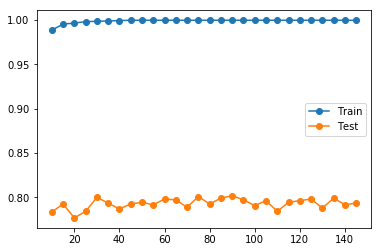

In [21]:
from sklearn.metrics import accuracy_score

from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(10, 150,5)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(n_estimators=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## SVM

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# train the model on train set
model = SVC()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
#print(classification_report(y_test, predictions))

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.685714, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.710714, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.712753, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.560714, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.573810, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.550656, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.414286, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.427381, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.402861, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   24.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [89]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
                  precision    recall  f1-score   support

         Sitting       0.81      0.81      0.81       386
        Sleeping       0.80      0.88      0.84       355
Standing or None       0.85      0.77      0.80       339

     avg / total       0.82      0.82      0.82      1080

Accuracy: 0.8194444444444444


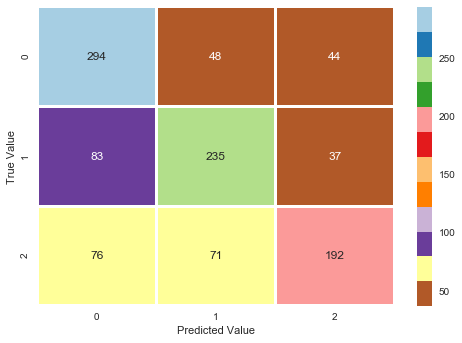

In [49]:
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

## KNN

In [52]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [54]:
from sklearn.neighbors import KNeighborsClassifier

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3)

In [55]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished


In [58]:
g_res.best_score_

0.8086542278682016

In [59]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [60]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [61]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [90]:
print(classification_report(y_test, y_knn))
print("Accuracy:",metrics.accuracy_score(y_test, y_knn))

                  precision    recall  f1-score   support

         Sitting       0.81      0.83      0.82       386
        Sleeping       0.79      0.87      0.83       355
Standing or None       0.86      0.74      0.80       339

     avg / total       0.82      0.81      0.81      1080

Accuracy: 0.8148148148148148


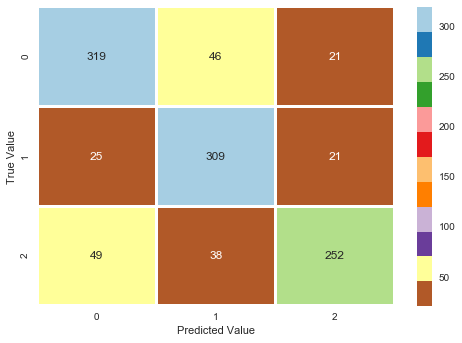

In [64]:
cm=confusion_matrix(y_test, y_knn)
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()